In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

In [2]:
logfile = '../densenet_small/test_log.tsv'
SUPER_TITLE = 'DenseNet-S'
logs = pd.read_table(logfile, header=0, index_col=None)

# Get training step and magnification as columns
def add_cols(logs):
    steppatt = r'.-(?P<step>\d+)'
    magpatt = r'^(?P<mag>\d{1,2}x)/.+'
    steps = []
    mags = []
    for x in logs['SNAPSHOT']:
        step = re.findall(pattern=steppatt, string=x)[0]
        mag = re.findall(pattern=magpatt, string=x)[0]
        steps.append(int(step))
        mags.append(mag)

    tdf = pd.DataFrame({'STEP': steps, 'MAG': mags}, index=logs.index)
    logs = logs.join(tdf, how='inner')
    return logs

logs = add_cols(logs)


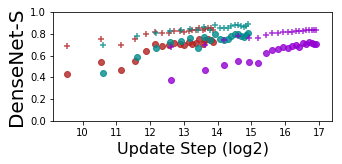

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(5,2))
# f1_cols = ['G3_F1', 'G4_F1', 'G5_F1', 'BN_F1', 'ST_F1', 'OVERALL_F1']
# a_cols = ['G3_A', 'G4_A', 'G5_A', 'BN_A', 'ST_A', 'OVERALL_A']
f1_cols = ['OVERALL_F1']
a_cols = ['OVERALL_A']
colors = ['firebrick', 'darkcyan', 'darkviolet']

for mag, color in zip(['5x', '10x', '20x'], colors):
    df = logs.iloc[[mag in x for x in logs['SNAPSHOT']], :]
#     for ax, a_col, f1_col in zip(axs, a_cols, f1_cols):
#         sns.regplot(np.log2(df['STEP']), df[a_col], fit_reg=False, label=mag+' Acc', ax=ax, color=color, marker='+')
#         sns.regplot(np.log2(df['STEP']), df[f1_col], fit_reg=False, label=mag+' F1', ax=ax, color=color)

    sns.regplot(np.log2(df['STEP']), df['OVERALL_A'], fit_reg=False, label=mag+' Acc', ax=axs, color=color, marker='+')
    sns.regplot(np.log2(df['STEP']), df['OVERALL_F1'], fit_reg=False, label=mag+' F1', ax=axs, color=color)
    
# for ax, col in zip(axs, a_cols):
# axs.set_title(col.replace('_A', ''))
axs.set_ylabel('')
axs.set_ylim([0,1.])
axs.set_xlabel('Update Step (log2)', fontsize=16)
# axs.set_xlabel('')
    
# plt.legend(bbox_to_anchor=(1.01, 0.9))
# axs.set_title('Overall Accuracy and F1-scores', fontsize=22)
axs.set_ylabel('{}'.format(SUPER_TITLE), fontsize=20)
plt.savefig('/home/ing/Dropbox/_Papers/gleason_grade/pixel_performance_{}.pdf'.format(SUPER_TITLE), bbox_inches='tight')

In [3]:
## Max overall Accuracy
logs.sort_values(by='OVERALL_A', ascending=False)

,SNAPSHOT,G3_A,G4_A,G5_A,BN_A,ST_A,G3_F1,G4_F1,G5_F1,BN_F1,ST_F1,OVERALL_A,OVERALL_F1,MAG,STEP
34,10x/snapshots/densenet.ckpt-30845,0.960803,0.947267,0.969718,0.970210,0.926638,0.746769,0.865107,0.776206,0.695897,0.939917,0.887318,0.804779,10x,30845
29,10x/snapshots/densenet.ckpt-23250,0.961657,0.940386,0.965193,0.971399,0.923558,0.748145,0.846326,0.754260,0.714634,0.937238,0.881097,0.800120,10x,23250
30,10x/snapshots/densenet.ckpt-24800,0.962585,0.937086,0.964548,0.973184,0.918122,0.713408,0.840638,0.761480,0.741798,0.933006,0.877762,0.798066,10x,24800
23,10x/snapshots/densenet.ckpt-15500,0.962580,0.941819,0.960745,0.970304,0.917941,0.751159,0.850760,0.746296,0.714073,0.931685,0.876694,0.798795,10x,15500
33,10x/snapshots/densenet.ckpt-29450,0.957124,0.930702,0.967386,0.970287,0.925377,0.731451,0.826275,0.755369,0.698512,0.938307,0.875438,0.789983,10x,29450
28,10x/snapshots/densenet.ckpt-21700,0.958360,0.940766,0.957083,0.968343,0.923749,0.744151,0.852250,0.713937,0.675618,0.935854,0.874150,0.784362,10x,21700
31,10x/snapshots/densenet.ckpt-26350,0.957470,0.931106,0.959567,0.969126,0.924414,0.743898,0.815827,0.728440,0.692428,0.937563,0.870842,0.783631,10x,26350
32,10x/snapshots/densenet.ckpt-27900,0.961034,0.928400,0.946839,0.968762,0.926066,0.737022,0.811340,0.692144,0.676827,0.938540,0.865550,0.771175,10x,27900
21,10x/snapshots/densenet.ckpt-12400,0.954738,0.929082,0.953511,0.970766,0.912265,0.685754,0.816992,0.702861,0.712108,0.927519,0.860181,0.769047,10x,12400
27,10x/snapshots/densenet.ckpt-20150,0.954587,0.930663,0.946654,0.965022,0.918467,0.712224,0.810881,0.687769,0.613822,0.932847,0.857697,0.751509,10x,20150


In [4]:
## Max overall F1
logs.sort_values(by='OVERALL_F1', ascending=False)

,SNAPSHOT,G3_A,G4_A,G5_A,BN_A,ST_A,G3_F1,G4_F1,G5_F1,BN_F1,ST_F1,OVERALL_A,OVERALL_F1,MAG,STEP
34,10x/snapshots/densenet.ckpt-30845,0.960803,0.947267,0.969718,0.970210,0.926638,0.746769,0.865107,0.776206,0.695897,0.939917,0.887318,0.804779,10x,30845
29,10x/snapshots/densenet.ckpt-23250,0.961657,0.940386,0.965193,0.971399,0.923558,0.748145,0.846326,0.754260,0.714634,0.937238,0.881097,0.800120,10x,23250
23,10x/snapshots/densenet.ckpt-15500,0.962580,0.941819,0.960745,0.970304,0.917941,0.751159,0.850760,0.746296,0.714073,0.931685,0.876694,0.798795,10x,15500
30,10x/snapshots/densenet.ckpt-24800,0.962585,0.937086,0.964548,0.973184,0.918122,0.713408,0.840638,0.761480,0.741798,0.933006,0.877762,0.798066,10x,24800
33,10x/snapshots/densenet.ckpt-29450,0.957124,0.930702,0.967386,0.970287,0.925377,0.731451,0.826275,0.755369,0.698512,0.938307,0.875438,0.789983,10x,29450
28,10x/snapshots/densenet.ckpt-21700,0.958360,0.940766,0.957083,0.968343,0.923749,0.744151,0.852250,0.713937,0.675618,0.935854,0.874150,0.784362,10x,21700
31,10x/snapshots/densenet.ckpt-26350,0.957470,0.931106,0.959567,0.969126,0.924414,0.743898,0.815827,0.728440,0.692428,0.937563,0.870842,0.783631,10x,26350
32,10x/snapshots/densenet.ckpt-27900,0.961034,0.928400,0.946839,0.968762,0.926066,0.737022,0.811340,0.692144,0.676827,0.938540,0.865550,0.771175,10x,27900
21,10x/snapshots/densenet.ckpt-12400,0.954738,0.929082,0.953511,0.970766,0.912265,0.685754,0.816992,0.702861,0.712108,0.927519,0.860181,0.769047,10x,12400
39,10x/snapshots/densenet.ckpt-9300,0.957112,0.922300,0.952799,0.964830,0.898419,0.689123,0.801129,0.682620,0.699654,0.915737,0.847730,0.757652,10x,9300


## Model comparison

In [42]:
# unet_log = '../unet/unet_log.tsv'
# unet_log = pd.read_table(unet_log, header=0, index_col=None)
# unet_log = add_cols(unet_log)

tiramisu_log = '../densenet/test_log.tsv'
tiramisu_log = pd.read_table(tiramisu_log, header=0, index_col=None)
tiramisu_log = add_cols(tiramisu_log)

fcn_log = '../fcn8s/test_log.tsv'
fcn_log = pd.read_table(fcn_log, header=0, index_col=None)
fcn_log = add_cols(fcn_log)